<a href="https://colab.research.google.com/github/JhonnCarvajal/TU-InstituteofTransportSciences/blob/main/MyCustomizeCropper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install geopandas

In [ ]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon
# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns
import os.path
from os import path
# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


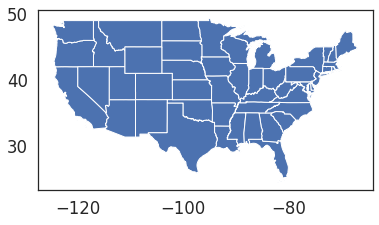

In [ ]:
state_boundary_us_path = os.path.join("/","content","data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)
state_boundary_us.plot()

[-124.725839   24.498131  -66.949895   49.384358]


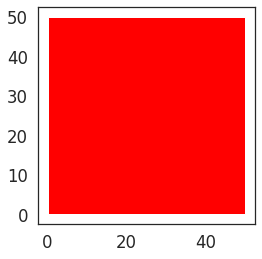

In [ ]:


my_crop_area = gpd.GeoDataFrame({'geometry':[Polygon([(0,0),(0,50),(50,50),(50,0)])]})
my_crop_area.to_file("grid.shp")
my_crop_area.plot(color="red")
my_crop_area.set_crs("epsg:4326", inplace=True)
print(state_boundary_us.total_bounds)

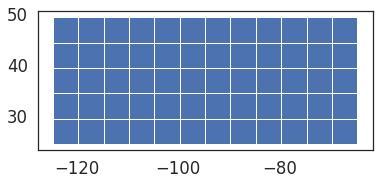

In [ ]:
points = state_boundary_us
xmin,ymin,xmax,ymax =  points.total_bounds
width = 5
height = 5
rows = int(np.ceil((ymax-ymin) /  height))
cols = int(np.ceil((xmax-xmin) / width))
XleftOrigin = xmin
XrightOrigin = xmin + width
YtopOrigin = ymax
YbottomOrigin = ymax- height
polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")
grid.plot()

Are the polygons in the same crs: True


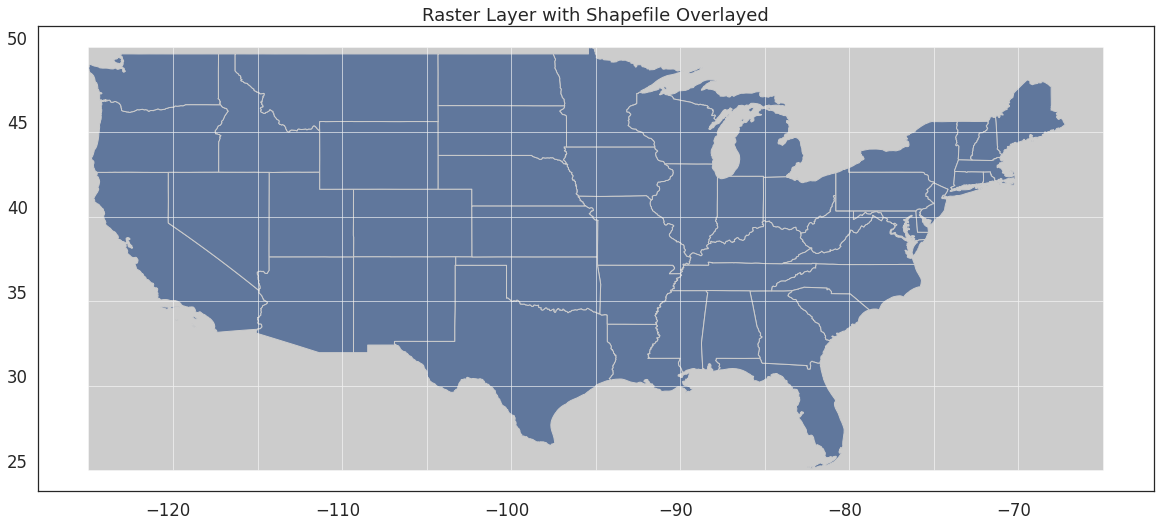

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
state_boundary_us.plot(ax=ax)
grid.plot(ax=ax, color="gray", alpha=0.4)
ax.set(title="Raster Layer with Shapefile Overlayed")
print("Are the polygons in the same crs:", state_boundary_us.crs == my_crop_area.crs)
#ax.set_axis_off()
plt.show()

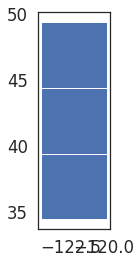

In [ ]:
grid.head(3).plot()

In [ ]:
cell2=grid.loc[4, ('geometry')]
map_clipped = gpd.clip(test_state_boundary_us,cell2)


True

La siguiente casilla no contenia informacion de ningun tipo: 4


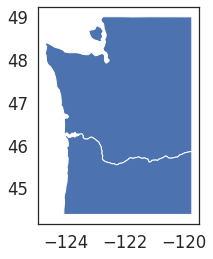

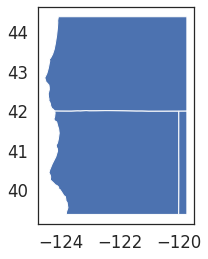

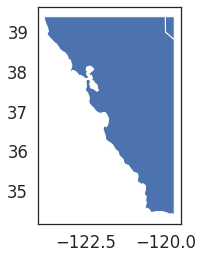

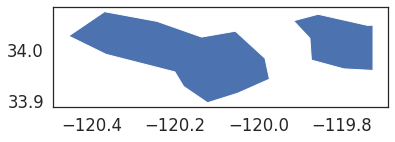

In [247]:

for x in range(0,5):
  cell=grid.loc[x, ('geometry')]
  #cell2
  map_clipped = gpd.clip(test_state_boundary_us,cell)
  #print("Map clipped crs:",map_clipped.crs)
  #print("state boundary us crs:",state_boundary_us.crs)
  if(map_clipped.empty):
    print("La siguiente casilla no contenia informacion de ningun tipo:",x)
  else:
    map_clipped.plot()
    os.mkdir('/content/resultados/mi_resultado%s'%x)
    map_clipped.to_file("/content/resultados/mi_resultado%s/MiResultado%s.shp"%(x,x) , mode="w")



In [ ]:
map_clipped

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
14,41,01155107,0400000US41,41,OR,Oregon,00,248608666869,6190902750,West,"POLYGON Z ((-124.48094 42.95150 0.00000, -124...."
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"POLYGON Z ((-124.30135 40.65964 0.00000, -124...."
46,32,01779793,0400000US32,32,NV,Nevada,00,284331571298,2049092975,West,"POLYGON Z ((-120.00303 39.44505 0.00000, -120...."
